In [1]:
from sentinelsat import SentinelAPI

user = 'username' 
password ='password'  
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [2]:
import folium
import os
import numpy as np

from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt 
# import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from shapely.geometry import MultiPolygon, Polygon
import rasterio as rio
from rasterio.plot import show
import rasterio.mask
import fiona

from collections import OrderedDict
import numpy
from rasterio.merge import merge



# Ethiopia

In [3]:
import geopandas as gpd
import folium 

nReserve = gpd.read_file('ethiopia.geojson')

m = folium.Map([9.12, 39.25], zoom_start=4)
folium.GeoJson(nReserve).add_to(m)
m

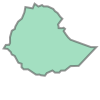

In [4]:
from shapely.geometry import MultiPolygon, Polygon

footprint = None
for i in nReserve['geometry']:
    footprint = i
footprint

# All Tiles covering Ethiopia

In [5]:
with open('ethio_sentinel_tiles.txt', 'r') as f:
    f = f.read().split() 

In [6]:
query_kwargs = {'date' :('20190301', '20190726'),
                'order_by' : 'cloudcoverpercentage',
                'platformname' : 'Sentinel-2',
                'processinglevel' : 'Level-1C',
                'order_by': '+cloudcoverpercentage, -beginposition',
                'limit': 1
               }

products_tile = OrderedDict()
for tile in f[:-1]:
    kw = query_kwargs.copy()
    kw['tileid'] = tile
    pp = api.query(**kw)
    products_tile.update(pp)

In [10]:
products_tile_gdf = api.to_geodataframe(products_tile)


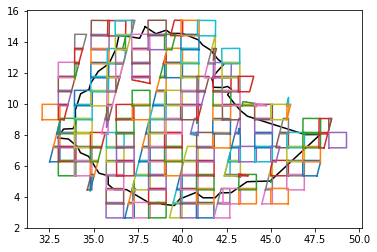

In [11]:
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon, Polygon

plt.plot(*footprint.exterior.xy, color='black')
for i in products_tile_gdf['geometry']:
    plt.plot(*i[0].exterior.xy)

    

# 8 Selected Tiles in SouthWestern Ethiopia

In [12]:
selected_tiles = ['36NZM', '37NBG', '36NZN', '37NBH', '36NZP', '37NBJ', '37PBK', '36NZL']


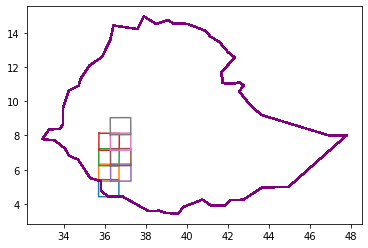

In [13]:
for i, j in zip(products_tile_gdf['title'], products_tile_gdf['geometry']):
    
    plt.plot(*footprint.exterior.xy, color='purple')

    if(i[39:44] in selected_tiles):
        plt.plot(*j[0].exterior.xy)

In [15]:
R10_1 = 'S2A_MSIL1C_20190303T074821_N0207_R135_T36NZN_20190303T100446.SAFE/GRANULE/L1C_T36NZN_A019294_20190303T080235/IMG_DATA'
R10_2 = 'S2A_MSIL1C_20190303T074821_N0207_R135_T36NZP_20190303T100446.SAFE/GRANULE/L1C_T36NZP_A019294_20190303T080235/IMG_DATA'
R10_3 = 'S2A_MSIL1C_20190313T074711_N0207_R135_T36NZM_20190313T131618.SAFE/GRANULE/L1C_T36NZM_A019437_20190313T080640/IMG_DATA'
R10_4 = 'S2A_MSIL1C_20190313T074711_N0207_R135_T37NBG_20190313T131618.SAFE/GRANULE/L1C_T37NBG_A019437_20190313T080640/IMG_DATA'
R10_5 = 'S2A_MSIL1C_20190323T074611_N0207_R135_T36NZL_20190323T105832.SAFE/GRANULE/L1C_T36NZL_A019580_20190323T080452/IMG_DATA'
R10_6 = 'S2A_MSIL1C_20190323T074611_N0207_R135_T37NBH_20190323T105832.SAFE/GRANULE/L1C_T37NBH_A019580_20190323T080452/IMG_DATA' 
R10_7 = 'S2A_MSIL1C_20190502T074621_N0207_R135_T37NBJ_20190502T095023.SAFE/GRANULE/L1C_T37NBJ_A020152_20190502T080204/IMG_DATA'
R10_8 = 'S2A_MSIL1C_20190502T074621_N0207_R135_T37PBK_20190502T095023.SAFE/GRANULE/L1C_T37PBK_A020152_20190502T080204/IMG_DATA'

In [16]:
red_1 = R10_1 + '/T36NZN_20190303T074821_B04.jp2'
nir_1 = R10_1 + '/T36NZN_20190303T074821_B08.jp2'
red_2 = R10_2 + '/T36NZP_20190303T074821_B04.jp2'
nir_2 = R10_2 + '/T36NZP_20190303T074821_B08.jp2'
red_3 = R10_3 + '/T36NZM_20190313T074711_B04.jp2'
nir_3 = R10_3 + '/T36NZM_20190313T074711_B08.jp2'
red_4 = R10_4 + '/T37NBG_20190313T074711_B04.jp2'
nir_4 = R10_4 +'/T37NBG_20190313T074711_B08.jp2'
red_5 = R10_5 +'/T36NZL_20190323T074611_B04.jp2'
nir_5 = R10_5 +'/T36NZL_20190323T074611_B08.jp2'
red_6 = R10_6 +'/T37NBH_20190323T074611_B04.jp2'
nir_6 = R10_6 +'/T37NBH_20190323T074611_B08.jp2'
red_7 = R10_7 +'/T37NBJ_20190502T074621_B04.jp2'
nir_7 = R10_7 +'/T37NBJ_20190502T074621_B08.jp2'
red_8 = R10_8 +'/T37PBK_20190502T074621_B04.jp2'
nir_8 = R10_8 +'/T37PBK_20190502T074621_B08.jp2'

In [17]:
red = [red_1, red_2, red_3, red_4, red_5, red_6, red_7, red_8]
nir = [nir_1, nir_2, nir_3, nir_4, nir_5, nir_6, nir_7, nir_8]

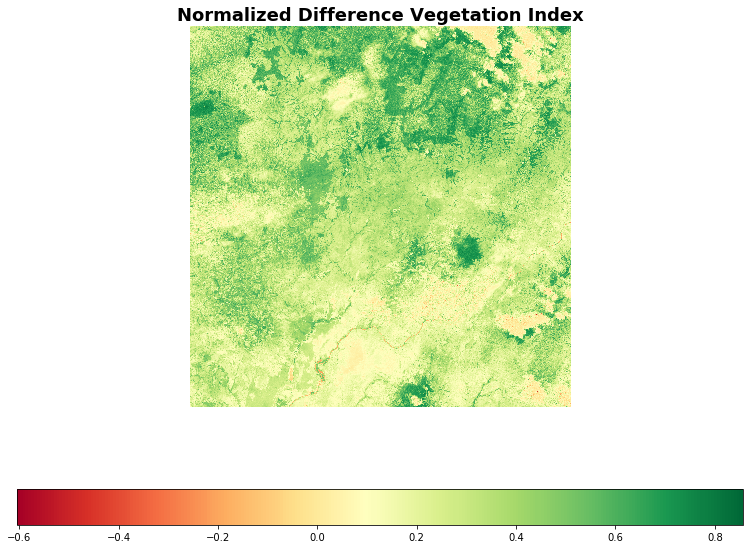

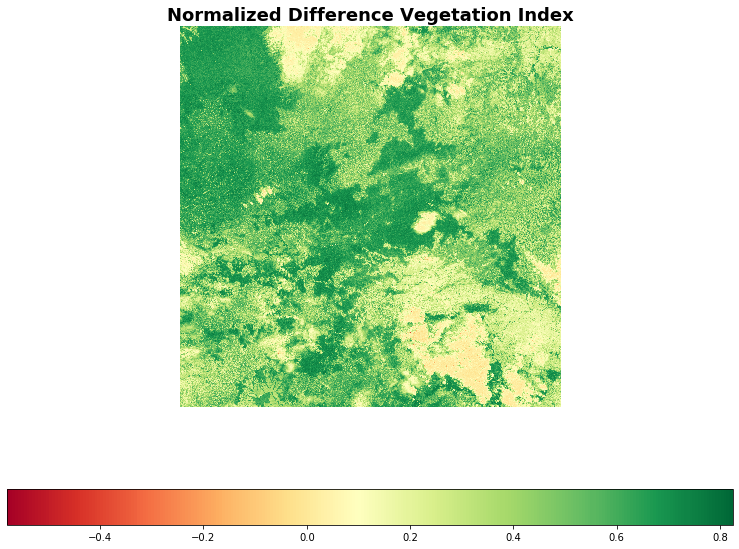

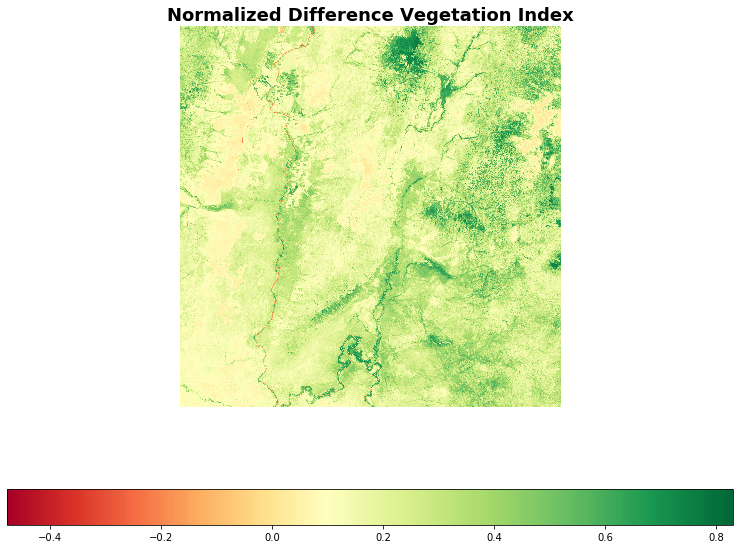

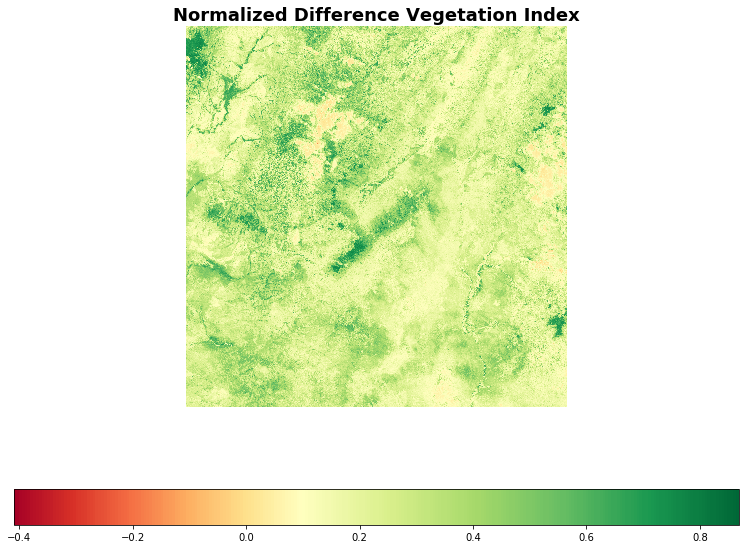

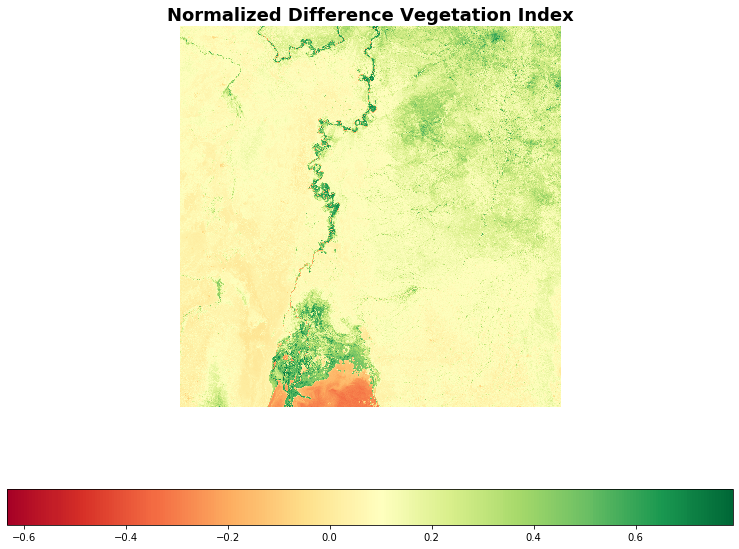

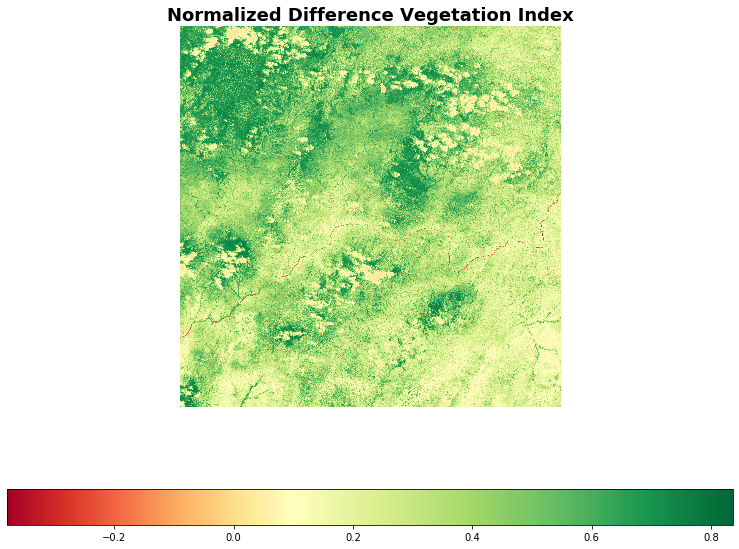

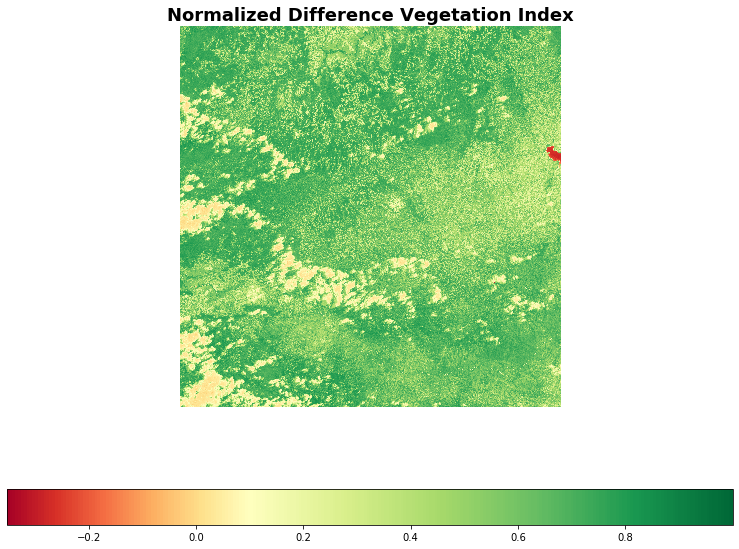

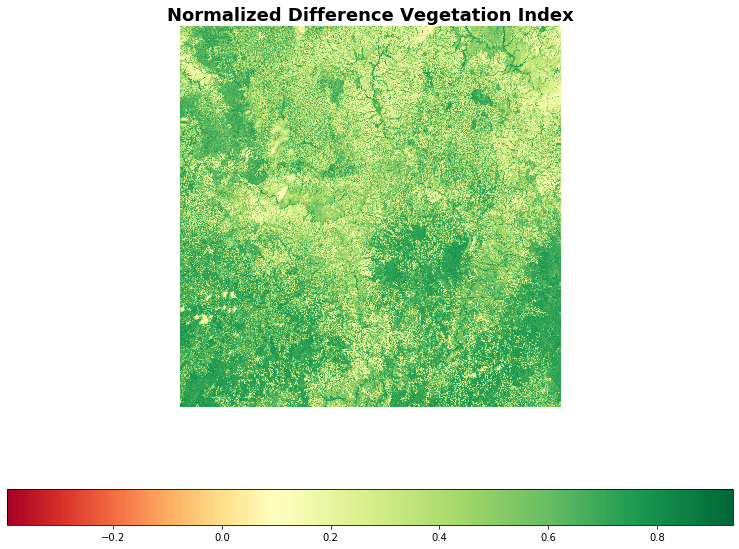

In [20]:

for i in range(len(red)):
    
    nir_this = rio.open(nir[i]).read()
    red_this = rio.open(red[i]).read()
    ndvi = (nir_this.astype(float)-red_this.astype(float))/(nir_this+red_this)
    
    min=numpy.nanmin(ndvi)
    max=numpy.nanmax(ndvi)
    # Set our custom midpoint for most effective NDVI analysis
    mid=0.1

    # Set your favorite diverging color scheme 
    # You can use https://matplotlib.org/users/colormaps.html as a reference
    colormap = plt.cm.RdYlGn 

    # Call MidPointNormalize with our min, max, and custom midpoint
    norm = MidpointNormalize(vmin=min, vmax=max, midpoint=mid)

    # Create a pyplot figure, in which we'll display our colorized NDVI
    fig = plt.figure(figsize=(20,10))

    # Add a subplot to our figure, which will contain the colorbar
    ax = fig.add_subplot(111)

    # Use 'imshow' to specify the input data, colormap, min, max, and norm for the colorbar
    cbar_plot = ax.imshow(ndvi[0], cmap=colormap, vmin=min, vmax=max, norm=norm)
    

    # Turn off the display of axis labels 
    ax.axis('off')

    # Set a title 
    ax.set_title('Normalized Difference Vegetation Index', fontsize=18, fontweight='bold')

    # Configure the colorbar
    cbar = fig.colorbar(cbar_plot, orientation='horizontal', shrink=0.65)

    # Call 'savefig' to save this plot to an image file
    fig.savefig('ndvi-'+ str(i) + '.tif', dpi=200, bbox_inches='tight', pad_inches=0.7)

    # Finally - let's take a look!
    plt.show()
    
    

In [19]:
# taken from scipy tutorial 

from matplotlib import colors

# Credit: Joe Kington
class MidpointNormalize(colors.Normalize):
    """
    Normalize the colorbar so that diverging bars work there way either side from a prescribed midpoint value
    
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return numpy.ma.masked_array(numpy.interp(value, x, y), numpy.isnan(value))

In [ ]:
# for i in range(len(red)):
#     nir_this = rio.open(nir[i])
#     nir_read = nir_this.read()
    
#     red_this = rio.open(red[i])
#     red_read = red_this.read()
    
#     ndvi = (nir_read.astype(float)-red_read.astype(float))/(nir_read+red_read)
    
#     meta = nir_this.meta
#     meta.update(driver = 'GTiff')
#     meta.update(dtype = rio.float32)
    
#     with rio.open('ndvi-'+ str(i) + '.tif', 'w', **meta) as dst:
#         dst.write(ndvi.astype(rio.float32))